<a href="https://colab.research.google.com/github/BureddySaiPoojitha/Module1_Lab3_AIML-/blob/main/MODULE_1_LAB_3(AIML).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Transforming data using linear algebra**

# Module 1, Lab 3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

def plotGrid(transform,unit,linestyle=":",fig=None,ax=None):
    lim1=-100
    lim2=100
    def mat2xy(start,end):
      if len(start.shape)==1:
        start=np.expand_dims(start,0)
        end=np.expand_dims(end,0)
      # Replace npnan with np.nan
      nan=np.ones(len(start))*np.nan
      x=np.stack((start[:,1],end[:,1],nan)).T.reshape(-1)
      y=np.stack((start[:,0],end[:,0],nan)).T.reshape(-1)
      return x,y
    def parallellines(axis,addend,lines,unit):
      addend=np.repeat(np.expand_dims(addend,0),lines*2,0)
      unit=np.expand_dims(np.arange(-lines,lines)*unit,1)
      unit=unit-lines
      adend=addend*unit
      lines=np.expand_dims(axis,0)+addend
      return np.concatenate((lines,lines*-1))
    if fig is None:
      fig,ax=plt.subplots(figsize=(10,10))
    transform=transform.astype(float)
    xaxis=transform[0]
    yaxis=transform[1]

    lines1=parallellines(xaxis*lim1,yaxis,100,unit)
    lines2=parallellines(xaxis*lim2,yaxis,100,unit)
    x,y=mat2xy(lines1,lines2)
    # Access linestyle as a variable, not as an attribute of y
    plt.plot(x,y,linestyle+"k",linewidth=0.5)

    x,y=mat2xy(xaxis*lim1,xaxis*lim2)
    # Access linestyle as a variable, not as an attribute of y
    plt.plot(x,y,linestyle,color="#440077")

    lines1=parallellines(yaxis*lim1,xaxis,100,unit)
    lines2=parallellines(yaxis*lim2,xaxis,100,unit)
    x,y=mat2xy(lines1,lines2)
    # Access linestyle as a variable, not as an attribute of y
    plt.plot(x,y,linestyle+"k",linewidth=0.5)

    x,y=mat2xy(yaxis*lim1,yaxis*lim2)
    # Access linestyle as a variable, not as an attribute of y
    plt.plot(x,y,linestyle,color="#aa5500")
    return fig,ax

def plotData(x,y,xlabel="hole",ylabel="bound",fig=None,ax=None):
  if fig is None:
    fig,ax=plt.subplots()
  for i in range(nclasses):
    plt.scatter(x[y==i,0],x[y==i,1])
  plt.legend([str(i) for ii in range(nclasses)])
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  lim2=x.max()
  lim1=x.min()
  return fig,ax

# Matrix transformations on data

In [ ]:
T0=np.array([[1,0],[0,-5]])
T1=np.array([[2,0],[-1,3]])
data1=np.array([3,8])
data0=np.matmul(T1,data1)
print("Data in T0 = ",data0)
print("Data in T1 = ",data1)

Data in T0 =  [ 6 21]
Data in T1 =  [3 8]


<function matplotlib.pyplot.show(close=None, block=None)>

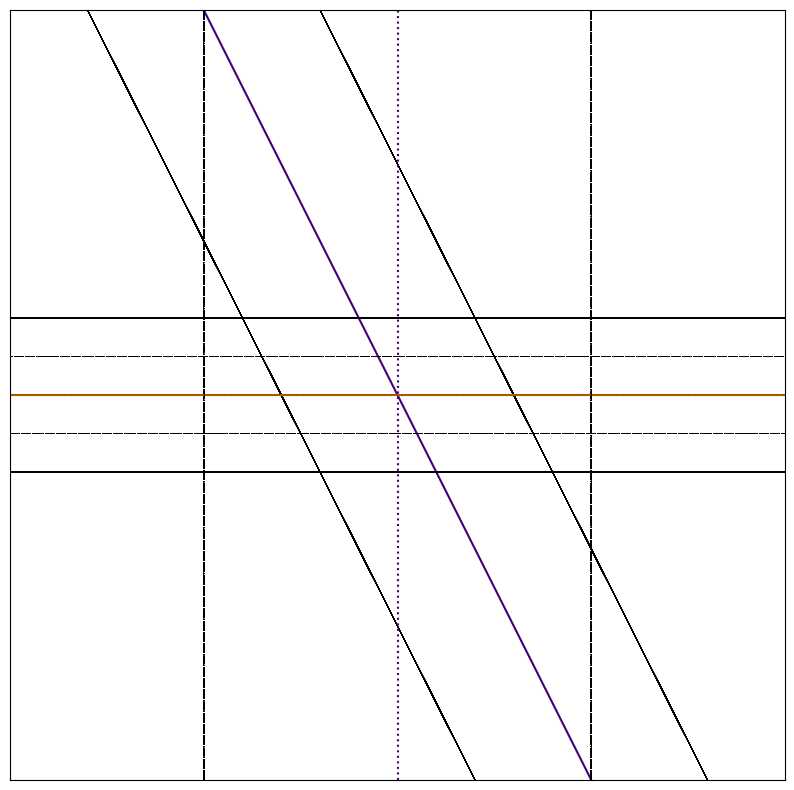

In [ ]:
fig,ax=plotGrid(T1.T,1,"-")
plotGrid(T0.T,1,fig=fig,ax=ax)
plt.scatter(data0[0],data0[1])
ax.set_xlim(-10,10)
ax.set_ylim(-10,10)
ax.set_xticks([])
ax.set_yticks([])
plt.show

In [ ]:
data0_a=np.matmul(T0,data0)
data0_b=np.matmul(data0,T0.T)
print("Data in T0 = ",data0_a)
print("Data in T0 = ",data0_b)

Data in T0 =  [   6 -105]
Data in T0 =  [   6 -105]


In [ ]:
A1=np.array([5,7])
B1=np.array([3,-9])
C1=np.array([2,-3])
A0=np.matmul(T1,A1)
B0=np.matmul(T1,B1)
C0=np.matmul(T1,C1)
def dist(a,b):
  diff=a-b
  sq=diff*diff
  return np.sqrt(sq.sum())
print("Distance between A and B in T1 = ",dist(A0,B0))
print("Distance between B and C in T1 = ",dist(B0,C0))
print("Distance between C and A in T1 = ",dist(C0,A0))
print("")
print("Distance between A and B in T0 = ",dist(A1,B1))
print("Distance between B and C in T0 = ",dist(B1,C1))
print("Distance between C and A in T0 = ",dist(C1,A1))

Distance between A and B in T1 =  46.17358552246078
Distance between B and C in T1 =  19.1049731745428
Distance between C and A in T1 =  27.65863337187866

Distance between A and B in T0 =  16.1245154965971
Distance between B and C in T0 =  6.082762530298219
Distance between C and A in T0 =  10.44030650891055


# Transformation on MNIST

In [ ]:
def NN1(traindata,trainlabel,query):
  diff=(traindata-query)
  sq=diff*diff
  dist=sq.sum()
  label=trainlabel[np.argmin(dist)]
  return label
def NN(traindata,trainlabel,testdata):
  predlabel=np.array([NN1(traindata,trainlabel,i) for i in testdata])
  return predlabel
def Accuracy(gtlabel,predlabel):
  assert len(gtlabel)==len(predlabel),"Length of the ground-truth labels and predicted labels should be the same"
  correct=(gtlabel==predlabel).sum()
  total=len(gtlabel)
  return correct/total
def cumArray(img):
  img2=img.copy()
  for i in range(1,img2.shape[0]):
    img2[i,:]=img2[i,:]+img2[i-1,:]
  img2=img2>0
  return img2
def getHolepixels(img):
  im1=cumArray(img)
  im2=np.rot90(cumArray(np.rot90(img)),3)
  im3=np.rot90(cumArray(np.rot90(img,2)),2)
  im4=np.rot90(cumArray(np.rot90(img,3)),1)
  hull=im1&im2&im3&im4
  hole=hull&~(img>0)
  return hole
def getHullPixels(img):
  im1=cumArray(img)
  im2=np.rot90(cumArray(np.rot90(img)),3)
  img3=np.rot90(cumArray(np.rot90(img,2)),2)
  im4=np.rot90(cumArray(np.rot90(img,3)),1)
  hull=im1&im2&im3&im4
  return hull

def minus(a,b):
  return a&~b
def getBoundaryPixels(img):
  img=img.copy()>0
  rshift=np.roll(img,1,1)
  lshift=np.roll(img,-1,1)
  ushift=np.roll(img,1,1)
  dshift=np.roll(img,-1,0)
  boundary=minus(img,rshift)|minus(img,lshift)|minus(img,ushift)|minus(img,dshift)
  return boundary

In [ ]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()
train_X=train_X/165
train_Y=train_X/165
nclasses=4
train_X=train_X[train_y<nclasses]
train_y=train_y[train_y<nclasses]
test_X=test_X[test_y<nclasses]
test_y=test_y[test_y<nclasses]
train_X=train_X[::90].copy()
train_y=train_y[::90].copy()
train_X=test_X[::100].copy()
train_y=test_y[::100].copy()

In [ ]:
train_hole=np.array([getHolepixels(i).sum() for i in train_X])
test_hole=np.array([getHolepixels(i).sum() for i in test_X])
train_bound=np.array([getBoundaryPixels(i).sum() for i in train_X])
test_bound=np.array([getBoundaryPixels(i).sum() for i in test_X])
train_feats=np.vstack((train_hole,train_bound)).transpose()
test_feats=np.vstack((test_hole,test_bound)).transpose()

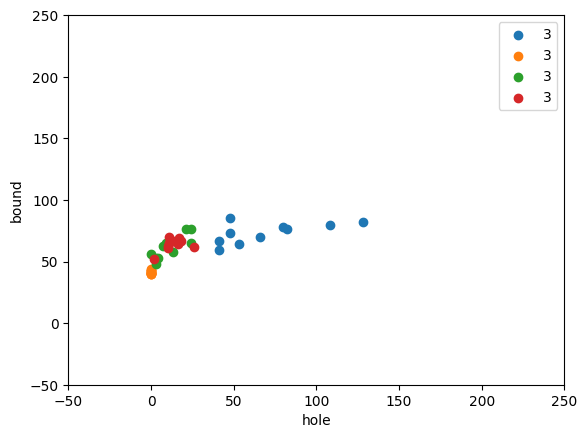

In [ ]:
xlim=[-50,250]
ylim=[-50,250]
fig,ax=plotData(x=train_feats,y=train_y)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
plt.show()

In [ ]:
test_pred=NN(train_feats,train_y,test_feats)
accuracy=Accuracy(test_y,test_pred)
print("Baseline accuracy : ",accuracy*100,"%","for",nclasses,"classes")

Baseline accuracy :  24.82559538128458 % for 4 classes


In [ ]:
transform=np.array([[1,-2],[0,1]])
print(transform)
train_feats_t=np.matmul(train_feats,transform.T)
test_feats_t=np.matmul(test_feats,transform.T)


[[ 1 -2]
 [ 0  1]]


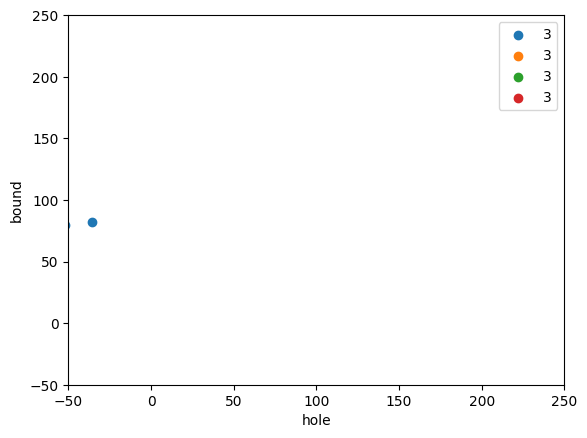

In [ ]:
fig,ax=plotData(x=train_feats_t,y=train_y)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
plt.show()

In [ ]:
test_pred=NN(train_feats_t,train_y,test_feats_t)
accuracy=Accuracy(test_y,test_pred)
print("Baseline Accuracy : ",accuracy*100,"%","for",nclasses,"classes")

Baseline Accuracy :  24.82559538128458 % for 4 classes


# **Questions**

**Will the same transform used for these two features also work for other features?**

 Some features might not benefit as much, especially if they represent different scales or contexts within the data. Testing each feature group is necessary to confirm.

Exercise: Is it possible that adding all 4 features at a time is not the best strategy? Can you think of a better combination of features that can help in improving the accuracy of the model? Maybe you can try adding 2 features at a time and see if that helps.

In [ ]:
from itertools import combinations
from sklearn.metrics import accuracy_score


accuracy_dict = {}

for feat_combo in combinations(range(train_feats.shape[1]), 2):
    train_feats_subset = train_feats[:, feat_combo]
    test_feats_subset = test_feats[:, feat_combo]
    train_feats_t = np.matmul(train_feats_subset, transform)
    test_feats_t = np.matmul(test_feats_subset, transform)
    pred_labels = NN(train_feats_t, train_y, test_feats_t)

    acc = accuracy_score(test_y, pred_labels)
    accuracy_dict[feat_combo] = acc
    print(f"Features {feat_combo} -> Accuracy: {acc:.4f}")

best_combo = max(accuracy_dict, key=accuracy_dict.get)
print(f"Best feature combination: {best_combo} with accuracy {accuracy_dict[best_combo]:.4f}")


Features (0, 1) -> Accuracy: 0.2483
Best feature combination: (0, 1) with accuracy 0.2483


# Data Normalisation

In [ ]:
def rescale(data):
  return (data-data.min())/(data.max()-data.min())

In [ ]:
train_feats_rescaled_x=rescale(train_feats[:,0])
train_feats_rescaled_y=rescale(train_feats[:,1]) # Use train_feats for y values as well
train_feats_rescaled=np.stack((train_feats_rescaled_x,train_feats_rescaled_y),1)
test_feats_rescaled_x=rescale(test_feats[:,0])
test_feats_rescaled_y=rescale(test_feats[:,1]) # Use test_feats[:,1] for consistency
test_feats_rescaled=np.stack((test_feats_rescaled_x,test_feats_rescaled_y),1)

(-50.0, 250.0)

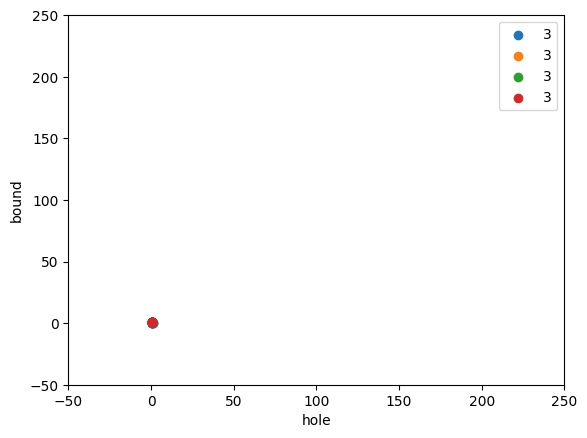

In [ ]:
fig,ax=plotData(train_feats_t,train_y)
ax.set_xlim(xlim)
ax.set_ylim(ylim)

In [ ]:
test_pred=NN(train_feats_rescaled,train_y,test_feats_rescaled)
accuracy=Accuracy(test_y,test_pred)
print("Accuracy after transform:",accuracy*100,"%")

Accuracy after transform: 24.82559538128458 %
